#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import warnings
warnings.simplefilter("ignore")

#Data

(V, Q, Q_r, S_i, dS, TS_i, dTS, N_i, dN, M, DO, i, Sig/TS, Sig, TKN, X, Th, Th_c, Th_n, Th_cn)

In [ ]:
df = pd.read_csv('/content/ASP_Data.csv')
df.head(3)

NameError: name 'pd' is not defined

In [ ]:
psi_1 = 0.8
psi_2 = 0.2

#C-BOD Removal Regression 1

In [ ]:
df1 = pd.DataFrame()

df1['y'] = df['V']*df['M']/(2*df['Q']*df['dS']*df['dTS'])
df1['x1'] = 2*df['Q']/(df['Si']*df['Sig']*df['V'])
df1['x2'] = 1/df['Sig']

df1.head(3)

,y,x1,x2
0,0.043786,0.000022,0.005319
1,0.037082,0.000018,0.004673
2,0.034930,0.000019,0.004717


In [ ]:
x1 = df1.drop(['y'], axis = 1)
y1 = df1['y']

In [ ]:
df1.corr()

,y,x1,x2
y,1.000000,0.441241,0.763896
x1,0.441241,1.000000,0.806139
x2,0.763896,0.806139,1.000000


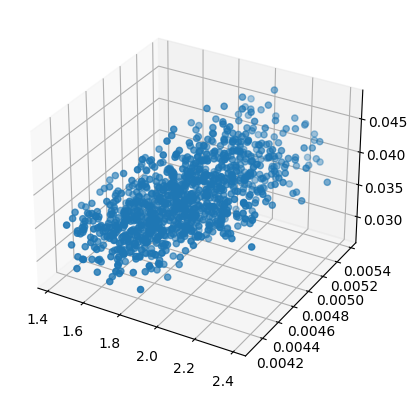

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df1['x1'], df1['x2'], df1['y'], label = "Actual")
plt.show()

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state = 41)

In [ ]:
LR1 = LinearRegression(fit_intercept = False)
LR1.fit(x1_train, y1_train)

LinearRegression(fit_intercept=False)

In [ ]:
y1_pred_test = LR1.predict(x1_test)
r21 = r2_score(y1_test, y1_pred_test)
r21

0.5919323073804714

###Equation

In [ ]:
coeff = LR1.coef_

a = coeff[0]
b = coeff[1]

print(f'y = ({a:.2e}).x1 + ({b:.2e}).x2')

y = (-5.91e+02).x1 + (1.01e+01).x2


In [ ]:
df1['y1_pred'] = LR1.predict(x1)

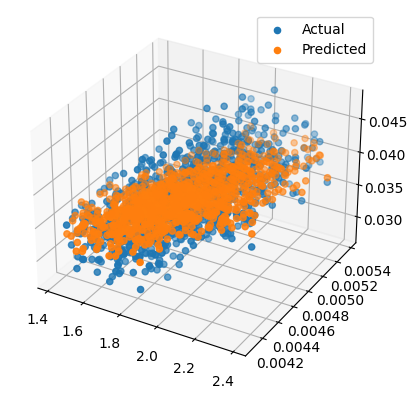

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df1['x1'], df1['x2'], df1['y'], label = "Actual")
axes.scatter(df1['x1'], df1['x2'], df1['y1_pred'], label='Predicted')
axes.legend()
plt.show()

###Constants

In [ ]:
c = a/b
# Ks/Kd = c*psi_1

#C-BOD Removal Regression 2

In [ ]:
df2 = pd.DataFrame()

df2['y'] = (2*c/(df['Si']*df['Th']) + 1)**(-1)
df2['x'] = 1/df['Th_c']

df2.head(3)

,y,x
0,1.048124,0.107181
1,1.046723,0.109649
2,1.047206,0.119760


In [ ]:
x2 = df2['x']
y2 = df2['y']

In [ ]:
df2.corr()

,y,x
y,1.000000,-0.144884
x,-0.144884,1.000000


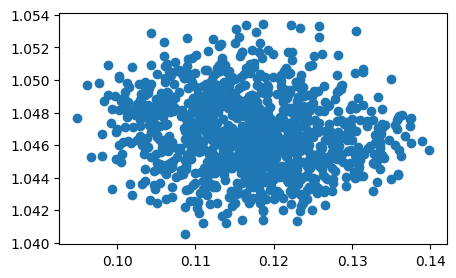

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x2, y2)
plt.show()

In [ ]:
def func2(x, alpha, beta):
  return alpha*x + beta

###Equation

In [ ]:
p0 = [1, 1]

popt2, pcov2 = curve_fit(func2, x2, y2, p0)

alpha = popt2[0]
beta = popt2[1]

print(f'y = ({alpha:.2e}).x + ({beta:.2e})')

y = (-4.01e-02).x + (1.05e+00)


In [ ]:
df2['y2_pred'] = func2(x2, alpha, beta)
r22_score = r2_score(df2['y2_pred'], y2)
r22_score

-45.63862121844915

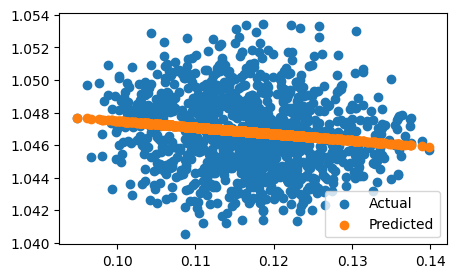

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x2, y2, label = "Actual")
plt.scatter(x2, df2['y2_pred'], label = "Predicted")
plt.legend()
plt.show()

###Constants

In [ ]:
Mu_max = 1/alpha
print(f'Values of Mu_max is {Mu_max:.3f}')

Values of Mu_max is -24.950


In [ ]:
Kd = beta/alpha
print(f'Values of Kd is {Kd:.3f}')

Values of Kd is -26.235


In [ ]:
Ks = c*0.8*beta/alpha
print(f'Values of Ks is {Ks:.3f}')

Values of Ks is 1233.844


In [ ]:
k = 1/(psi_1*b)
print(f'k = {k:.3f}')

k = 0.124


In [ ]:
Y = Mu_max/k
print(f'Y = {Y:.3f}')

Y = -200.784


###Psi_1 calc

In [ ]:
df['psi_1'] = (b*df['Si']*df['Q']/(2*a*df['V']))*(((1/alpha)*((1/df['Th_c'] + beta/alpha)**(-1)) - 1)**(-1))

df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Q,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1
0,0,8512.0,291,27,307,8,56,9,117,28,...,5174.26,9.33,8.80,264,299,47,89,2.200,11.026746,33.373849
1,1,8336.0,307,22,348,8,57,8,125,29,...,4941.43,9.12,8.58,285,340,49,96,2.145,10.399249,34.403288
2,2,8400.0,304,24,346,8,62,10,137,32,...,5192.60,8.35,8.58,280,338,52,105,2.145,10.458641,35.820366


#NH4-N Removal Regression 1

In [ ]:
df3 = pd.DataFrame()

df3['y'] = np.log(df['V']*df['Sig']*df['M']/(2*df['Q']*df['dN']*df['dTS']))
df3['x1'] = 2*df['Q']/(df['Ni']*df['V'])
df3['x2'] = 1/df['DO']

df3.head(3)

,y,x1,x2
0,3.833800,0.021710,0.327869
1,3.832016,0.020799,0.284900
2,3.685713,0.019941,0.287356


In [ ]:
y3 = df3['y']
x3 = df3.drop(['y'], axis = 1)

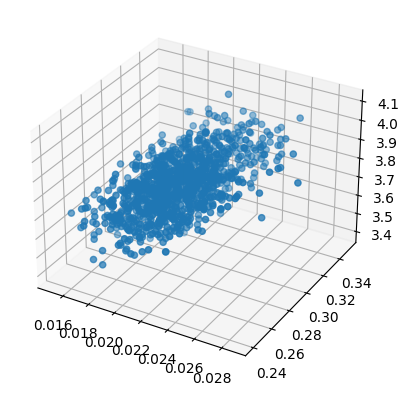

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

axes.scatter(df3['x1'], df3['x2'], df3['y'])
plt.show()

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 41)

In [ ]:
LR3 = LinearRegression()
LR3.fit(x3_train, y3_train)

LinearRegression()

In [ ]:
y3_pred_test = LR3.predict(x3_test)
r23 = r2_score(y3_test, y3_pred_test)
r23

0.23527110770542314

###Equation

In [ ]:
coeff = LR3.coef_
itcept = LR3.intercept_

b0 = itcept
b1 = coeff[0]
b2 = coeff[1]

print(f'Y = ({b0:.3f}) + ({b1:.3f}).X1 + ({b2:.2e}).X2')

Y = (3.171) + (26.799).X1 + (1.53e-01).X2


In [ ]:
df3['y_pred'] = LR3.predict(x3)
r23_score = r2_score(df3['y'], df3['y_pred'])
r23_score

0.2541672810089811

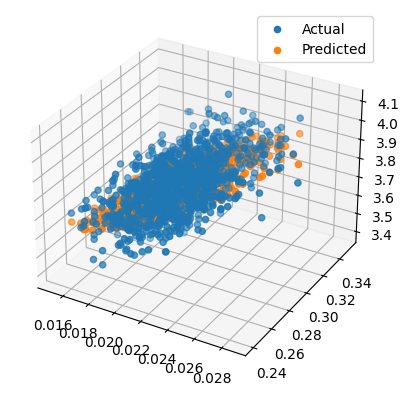

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

axes.scatter(df3['x1'], df3['x2'], df3['y'], label = "Actual")
axes.scatter(df3['x1'], df3['x2'], df3['y_pred'], label = "Predicted")
axes.legend()
plt.show()

###Constants

In [ ]:
kn = 7.39*np.exp(b0)
print(f'kn = {kn:.3f}')

kn = 176.189


In [ ]:
# Kdn/Kn = 1/(psi_2*b1)

In [ ]:
Ko = b2
print(f'Ko = {Ko:.3e}')

Ko = 1.533e-01


#NH4-N Removal Regression 2

In [ ]:
df4 = pd.DataFrame()

df4['y'] = 1/df['Th'] + df['Ni']/(2*b1)
df4['x1'] = df['Ni']*(df['Th_cn']**2)*(1 + b2/df['DO'])/(2*b1)
df4['x2'] = df['Ni']*df['Th_cn']*(1 + b2/df['DO'])/(2*b1)

df4.head(3)

,y,x1,x2
0,1.158435,133.422105,12.099862
1,1.180006,120.030377,11.542215
2,1.273292,132.102547,12.630948


In [ ]:
y4 = df4['y']
x4 = df4.drop(['y'], axis = 1)

In [ ]:
df4.corr()

,y,x1,x2
y,1.000000,0.714671,0.828982
x1,0.714671,1.000000,0.982136
x2,0.828982,0.982136,1.000000


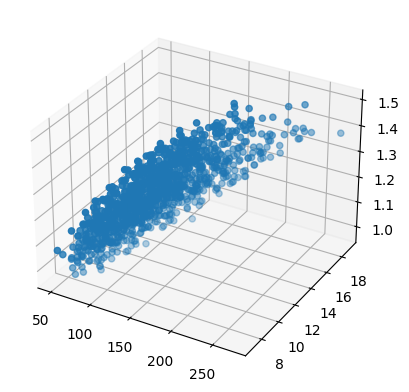

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

axes.scatter(df4['x1'], df4['x2'], df4['y'])
plt.show()

In [ ]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2, random_state = 41)

In [ ]:
LR4 = LinearRegression(fit_intercept = False)
LR4.fit(x4_train, y4_train)

LinearRegression(fit_intercept=False)

###Equation

In [ ]:
a = LR4.coef_[0]
b = LR4.coef_[1]

print(f'y = ({a:.2e}).x1 + ({b:.2e}).x2')

y = (-1.01e-02).x1 + (2.08e-01).x2


In [ ]:
df4['y_pred'] = LR4.predict(x4)
r24 = r2_score(df4['y'], df4['y_pred'])
r24

0.9435021624420342

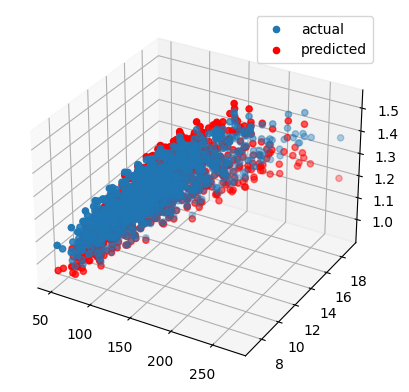

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

axes.scatter(df4['x1'], df4['x2'], df4['y'], label = "actual")
axes.scatter(df4['x1'], df4['x2'], df4['y_pred'], color = "red", label = "predicted")
axes.legend()

plt.show()

###Constants

In [ ]:
Mu_nm = b
print(f'Mu_nm = {Mu_nm:.2f}')

Mu_nm = 0.21


In [ ]:
Yn = Mu_nm/kn
print(f'Yn = {Yn:.2e}')

Yn = 1.18e-03


In [ ]:
Kdn = np.abs(a/b)
print(f'Kdn = {Kdn:.4f}')

Kdn = 0.0485


In [ ]:
Kn = psi_2*b1*Kdn
print(f'Kn = {Kn:.3f}')

Kn = 0.260


###Psi_2 Calc

In [ ]:
df['psi_2'] = 2*np.sqrt(np.abs(df['Q']*Kn/(df['Ni']*df['V']*(Mu_nm*(Ko/df['DO'] + 1)*Kdn*df['Th_cn']*(Kdn*df['Th_cn'] - 1) - 1))))

df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1,psi_2
0,0,8512.0,291,27,307,8,56,9,117,28,...,9.33,8.80,264,299,47,89,2.200,11.026746,33.373849,0.103503
1,1,8336.0,307,22,348,8,57,8,125,29,...,9.12,8.58,285,340,49,96,2.145,10.399249,34.403288,0.101313
2,2,8400.0,304,24,346,8,62,10,137,32,...,8.35,8.58,280,338,52,105,2.145,10.458641,35.820366,0.099200


#Results

####Psi_1

In [ ]:
psi_1 = df['psi_1'].mean()
psi_1_min = df['psi_1'].min()
psi_1_max = df['psi_1'].max()

print(f'psi_1 :\n Range       : ({psi_1_min:.3f}, {psi_1_max:.3f})')
print(f' Mean Value  : {psi_1:.4f}')

psi_1 :
 Range       : (29.124, 43.607)
 Mean Value  : 35.7990


####Psi_2

In [ ]:
psi_2 = df['psi_2'].mean()
psi_2_min = df['psi_2'].min()
psi_2_max = df['psi_2'].max()

print(f'psi_2 :\n Range       : ({psi_2_min:.3f}, {psi_2_max:.3f})')
print(f' Mean Value  : {psi_2:.4f}')

psi_2 :
 Range       : (0.086, 0.119)
 Mean Value  : 0.1007


####Constants

In [ ]:
print(f'Mu_max = {Mu_max:.1f}')
print(f'Mu_nm = {Mu_nm:.2f}\n')
print(f'Kd = {Kd:.3f}')
print(f'Kdn = {Kdn:.3f}\n')
print(f'Ks = {Ks:.3f}')
print(f'Kn = {Kn:.4f}')

Mu_max = -24.9
Mu_nm = 0.21

Kd = -26.235
Kdn = 0.049

Ks = 1233.844
Kn = 0.2601
